# Auditory Sound Processing - Part II: FFTs

author: Thomas Haslwanter\
date: April-2020

In [8]:
# Standard packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

# Special imports
from scipy.io.wavfile import read

## Fourier Transform & Power spectrum

To see the frequency content of this sound, we can transfer the signal from the time into the frequency domain

<img src='data/images/Idea_FourierTransform.png' style="width: 300px;"/>


For *n* discrete datapoints $f_n$, the Fourier Transformation is given by:

\begin{equation}
  {f_\tau } = \frac{1}{N}\sum\limits_{n = 0}^{N - 1} {{F_n}\,{e^{2\pi i\,\frac{n \cdot \tau }{N}}}} \hspace{5 mm} with \; \tau=1,...,N
\end{equation}

The coefficients $F_n$ can be obtained by the back-transformation:

\begin{equation}
  {F_n} = \sum\limits_{\tau  = 0}^{N - 1} {{f_\tau }\,{e^{ - 2\pi i\,\frac{{n \cdot \tau }}{N}}}}  \hspace{5 mm} with \enspace n=1,...,N
\end{equation}

In [9]:
audioDir = r'data\sounds'
soundFile = os.path.join(audioDir, 'a1.wav')
rate, data = read(soundFile)

nData = len(data)
duration = nData/rate

(0, 5512.296368807949)

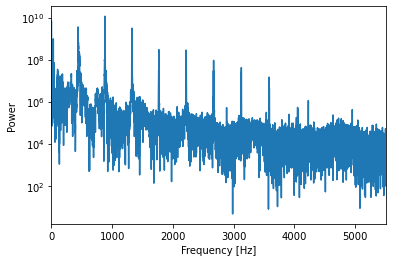

In [10]:
# 
# Fourier Transformation of the data
# Here we use the function "fft" from the package "np.fft"
fftData = np.fft.fft(data)

# The Powerspectrum only contains the magnitude of the Fourier components
# Note: The conversion to real is only to eliminate an annoying Warning message
Pxx = np.real(fftData*fftData.conj()) / nData
freq = np.arange(nData)/duration

# Plot the data
plt.semilogy(freq,Pxx)

# Format the plot
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
Nyquist = max(freq)/2
plt.xlim(0, Nyquist)

In [11]:
type(Pxx[0])

numpy.float64

### Interpretation of the Fourier Coefficients

Each Fourier coefficient is a complex number, with a magnitude and a phase.

<img src="data/images/ComplexNumber.jpg" width=300>

The magnitude gives the amplitude of the corresponding Fourier component; and the phase the phase shift, compared to a pure cosine wave.

### Symmetry of Powerspectrum
For real-valued inputs f(t) we have the following relation:

$F(ω)=F(−ω)^∗$

As a consequence, the powerspectrum is symmetrical!

Text(0, 0.5, 'Power')

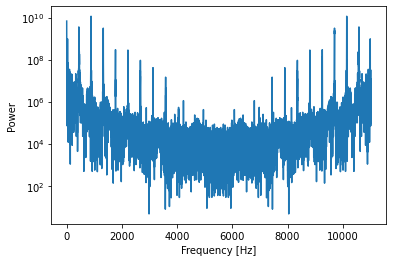

In [12]:
plt.semilogy(freq, Pxx)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

In [13]:
%precision 2
print(fftData[0])
print(fftData[1:3])  # second and third Fourier coefficients
print(fftData[:-3:-1]) # last two Fourier coefficients, with sequence reversed!
# Note that the last two components are the complex conjugate of the second and third component.
# The first component is real, and proportional to the offset.

(-13607461+0j)
[-167240.92-894878.j   -837190.94+290807.52j]
[-167240.92+894878.j   -837190.94-290807.52j]


### Frequency of the Fourier Coefficients
* The power in the *zero frequency* is proportional to the offset of the signal.
* The lowest frequency is determined by the length of the recorded signal: $f_1 =\frac{1}{\Delta t * N} = \frac{1}{Duration}$.
* The highest frequency is determined by the sample rate: $f_N = \frac{1}{\Delta t} = rate$.

## Further links to sound processing

* [FFMPEG](http://www.ffmpeg.org/) A complete, cross-platform solution to record, convert and stream audio and video. 
* [scikit-sound](http://work.thaslwanter.at/sksound/html/sounds.html) Class for reading/writing/playing sounds. Uses FFMPEG.
* [Pydub](http://pydub.com/) Lets you manipulate audio with a simple and easy high level interface. Requires FFMPEG.

[9_SoundProc_Basics](9_SoundProc_Basics.ipynb)<img src="data\images\Forward_Backward.png" align='middle'>[9_Soundproc_TimeDependence](9_Soundproc_TimeDependence.ipynb)